In [1]:
using Revise
using Plots
using LaTeXStrings
using LinearAlgebra
using SparseIR
using Nevanlinna

In [2]:
# Set work data Type
T = BigFloat
setprecision(512)
;

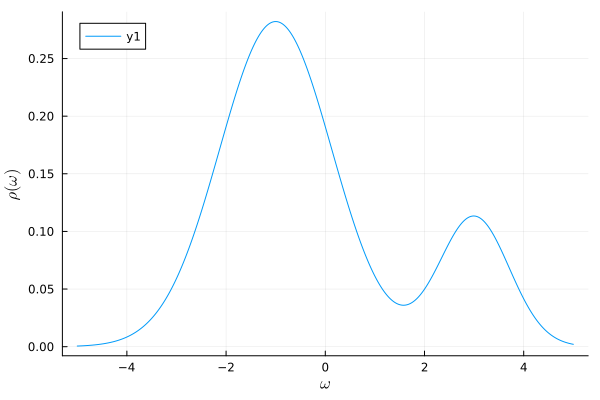

In [3]:
#define spectral function
gaussian(x, mu, sigma) = exp(-((x-mu)/sigma)^2)/(sqrt(π)*sigma)
rho(omega) = 0.8*gaussian(omega, -1.0, 1.6) + 0.2*gaussian(omega, 3, 1)
omegas = LinRange(-5, 5, 1000)
plot()
plot!(omegas, rho.(omegas), xlabel=latexstring("\\omega"), ylabel=latexstring("\\rho(\\omega)"))

In [4]:
function generate_input_data(rho::Function, beta::Float64)
    lambda = 1e+4
    wmax = lambda/beta
    basis = FiniteTempBasisSet(beta, wmax, 1e-15)

    rhol = [overlap(basis.basis_f.v[l], rho) for l in 1:length(basis.basis_f)]
    gl = - basis.basis_f.s .* rhol
    gw = evaluate(basis.smpl_wn_f, gl)
    
    hnw = length(basis.smpl_wn_f.sampling_points)÷2
    
    input_smpl = Array{Complex{T}}(undef, hnw) 
    input_gw   = Array{Complex{T}}(undef, hnw) 
    
    for i in 1:hnw
        input_smpl[i]= SparseIR.valueim(basis.smpl_wn_f.sampling_points[hnw+i], beta)
        input_gw[i]  = gw[hnw+i]
    end
    
    return input_smpl, input_gw
end

generate_input_data (generic function with 1 method)

In [5]:
beta = 100. #inverse temperature
input_smpl, input_gw = generate_input_data(rho, beta)
;

In [6]:
f64_input_smpl = ComplexF64.(input_smpl)
f64_input_gw   = ComplexF64.(input_gw)
;

In [7]:
N_real    = 1000  #demension of array of output
omega_max = 10.0  #energy cutoff of real axis
eta       = 0.001 #broaden parameter 
sum_rule  = 1.0   #sum rule
H_max     = 50    #cutoff of Hardy basis
lambda    = 1e-4  #regularization parameter
iter_tol  = 1000  #upper bound of iteration
;

In [8]:
#construct solver struct
@time sol     = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true)
@time f64_sol = Nevanlinna.NevanlinnaSolver(f64_input_smpl, f64_input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true)
;

N_imag is setted as 31
H=1
Iter     Function value   Gradient norm 
     0     1.394068e-01     1.354674e+00
 * time: 0.019511938095092773
     1     1.271921e-01     8.719071e-01
 * time: 1.1697719097137451
     2     9.446336e-02     9.728176e-01
 * time: 1.4582319259643555
     3     4.352172e-02     1.124699e+00
 * time: 1.7875709533691406
     4     3.614140e-02     6.164562e-02
 * time: 2.1461338996887207
     5     3.610852e-02     1.054229e-02
 * time: 2.5337908267974854
     6     3.610750e-02     1.921777e-03
 * time: 2.951411008834839
     7     3.610748e-02     1.512958e-04
 * time: 3.218502998352051
     8     3.610748e-02     2.197711e-05
 * time: 3.6878178119659424
     9     3.610748e-02     4.523937e-06
 * time: 3.9571659564971924
    10     3.610748e-02     6.640354e-07
 * time: 4.204288959503174
    11     3.610748e-02     1.213906e-07
 * time: 4.626020908355713
    12     3.610748e-02     1.825283e-08
 * time: 4.909693956375122
    13     3.610748e-02     3.485925e-

In [9]:
#execute optimize
@time Nevanlinna.solve!(sol)
@time Nevanlinna.solve!(f64_sol)

H=1
Iter     Function value   Gradient norm 
     0     3.610748e-02     3.485925e-09
 * time: 0.0002288818359375
max_theta=0.0765681561878727784316709472257185720435162757526388722938845753649857794053974746298739235788829300383428656183190727654273406225392252374702495083245044387
hardy optimization was success.
H=2
Iter     Function value   Gradient norm 
     0     3.610748e-02     4.607507e-01
 * time: 0.0002751350402832031
     1     3.458019e-02     3.832203e-01
 * time: 0.2530670166015625
     2     2.842299e-02     3.094581e-01
 * time: 0.6585450172424316
     3     2.588584e-02     2.989854e-01
 * time: 0.9433190822601318
     4     1.616310e-02     6.775993e-01
 * time: 1.1818339824676514
     5     1.152500e-02     1.850161e-01
 * time: 1.4321401119232178
     6     1.100075e-02     6.844742e-02
 * time: 1.8176820278167725
     7     1.081305e-02     3.099662e-02
 * time: 2.246187925338745
     8     1.079639e-02     1.175092e-02
 * time: 2.7071189880371094
     9     1.079

     0     4.326059e-04     1.758144e-02
 * time: 0.00022292137145996094
     1     4.302979e-04     2.036558e-02
 * time: 0.3589658737182617
     2     4.259369e-04     1.363101e-02
 * time: 0.6953790187835693
     3     4.207914e-04     1.750596e-02
 * time: 1.0070738792419434
     4     4.149208e-04     1.973621e-02
 * time: 1.3708648681640625
     5     4.068309e-04     1.920781e-02
 * time: 1.712270975112915
     6     3.904702e-04     1.711957e-02
 * time: 2.0877819061279297
     7     3.622576e-04     2.465795e-02
 * time: 2.406632900238037
     8     3.541879e-04     1.202338e-02
 * time: 2.747931957244873
     9     3.317255e-04     1.335290e-02
 * time: 3.271070957183838
    10     2.745317e-04     3.095028e-02
 * time: 3.7463719844818115
    11     2.227564e-04     1.468464e-02
 * time: 4.263458967208862
    12     2.109885e-04     1.550989e-02
 * time: 4.747825860977173
    13     1.980827e-04     7.102639e-03
 * time: 5.250802993774414
    14     1.965369e-04     5.610650e

    20     4.355850e-05     3.544771e-03
 * time: 9.85945200920105
    21     4.283155e-05     8.929579e-03
 * time: 10.621320009231567
    22     4.150436e-05     1.009261e-02
 * time: 11.328550100326538
    23     4.017304e-05     1.070078e-02
 * time: 12.127669095993042
    24     3.846031e-05     6.984470e-03
 * time: 12.975725173950195
    25     3.764900e-05     3.720964e-03
 * time: 13.704596042633057
    26     3.751465e-05     1.020167e-03
 * time: 14.243865966796875
    27     3.737960e-05     2.515373e-03
 * time: 15.083775043487549
    28     3.723503e-05     3.955188e-03
 * time: 15.791617155075073
    29     3.698031e-05     3.969317e-03
 * time: 16.46288514137268
    30     3.677679e-05     3.585829e-03
 * time: 17.273688077926636
    31     3.658214e-05     1.812335e-03
 * time: 18.030431985855103
    32     3.654232e-05     1.097643e-03
 * time: 18.70014500617981
    33     3.653096e-05     2.957180e-04
 * time: 19.133511066436768
    34     3.652719e-05     2.805534e-

    74     2.087451e-05     1.527074e-08
 * time: 47.75368309020996
    75     2.087451e-05     6.677158e-09
 * time: 48.18775200843811
max_theta=0.307550498139859184661116393698003358813383084845242722931029731353600996786266524365445345704276424242292718987286643835288638022851677410285844774916035204
hardy optimization was success.
H=10
Iter     Function value   Gradient norm 
     0     2.087451e-05     1.642045e-03
 * time: 0.0005679130554199219
     1     2.085762e-05     1.771897e-03
 * time: 0.49152302742004395
     2     2.084433e-05     1.436554e-03
 * time: 0.9184000492095947
     3     2.082461e-05     1.003930e-03
 * time: 1.3749229907989502
     4     2.080261e-05     1.485519e-03
 * time: 1.8284258842468262
     5     2.077629e-05     1.584673e-03
 * time: 2.269904851913452
     6     2.071961e-05     1.985487e-03
 * time: 2.74128794670105
     7     2.066185e-05     1.077461e-03
 * time: 3.207676887512207
     8     2.057210e-05     1.489606e-03
 * time: 3.6547639369964

    20     1.552328e-05     1.118633e-03
 * time: 11.497367858886719
    21     1.548590e-05     7.610136e-04
 * time: 12.26446795463562
    22     1.547711e-05     5.346446e-04
 * time: 13.197673797607422
    23     1.546584e-05     6.004953e-04
 * time: 14.21106481552124
    24     1.545872e-05     4.948380e-04
 * time: 14.77466893196106
    25     1.545022e-05     7.533934e-04
 * time: 15.90819787979126
    26     1.544206e-05     8.285847e-04
 * time: 16.840898990631104
    27     1.542948e-05     1.191343e-03
 * time: 17.698869943618774
    28     1.541692e-05     1.250469e-03
 * time: 18.455148935317993
    29     1.539190e-05     1.217199e-03
 * time: 19.25430393218994
    30     1.534632e-05     8.490581e-04
 * time: 20.317399978637695
    31     1.533805e-05     4.337097e-04
 * time: 20.833393812179565
    32     1.532971e-05     5.658508e-04
 * time: 21.88744592666626
    33     1.532206e-05     8.702819e-04
 * time: 22.81409001350403
    34     1.530867e-05     1.077244e-03


    22     1.404730e-05     6.749975e-04
 * time: 12.328754186630249
    23     1.403783e-05     3.274711e-04
 * time: 13.180438995361328
    24     1.403424e-05     4.539017e-04
 * time: 13.934062004089355
    25     1.402588e-05     4.503054e-04
 * time: 14.725954055786133
    26     1.402290e-05     3.365646e-04
 * time: 15.224924087524414
    27     1.401921e-05     4.677511e-04
 * time: 16.006063222885132
    28     1.401619e-05     5.479968e-04
 * time: 16.770787000656128
    29     1.401206e-05     5.214065e-04
 * time: 17.700136184692383
    30     1.400765e-05     4.361568e-04
 * time: 18.564362049102783
    31     1.400197e-05     3.571402e-04
 * time: 19.317726135253906
    32     1.400086e-05     1.045345e-04
 * time: 19.817854166030884
    33     1.399963e-05     2.323209e-04
 * time: 20.571824073791504
    34     1.399811e-05     3.991692e-04
 * time: 21.30416202545166
    35     1.399583e-05     4.450350e-04
 * time: 21.817313194274902
    36     1.399345e-05     5.20105

   143     1.355017e-05     2.400047e-08
 * time: 87.35832405090332
   144     1.355017e-05     1.241383e-08
 * time: 87.89712619781494
   145     1.355017e-05     9.070984e-09
 * time: 88.39363408088684
max_theta=0.38300372017623592925299654568447896592758679543947520104436690530825184325665272320695029300615782678791709489036411810426430037627890992956356003240115449
hardy optimization was success.
H=13
Iter     Function value   Gradient norm 
     0     1.355017e-05     3.312820e-04
 * time: 0.00023102760314941406
     1     1.354954e-05     3.152679e-04
 * time: 0.5585019588470459
     2     1.354919e-05     2.848043e-04
 * time: 1.0758180618286133
     3     1.354876e-05     2.030994e-04
 * time: 1.623025894165039
     4     1.354807e-05     1.518772e-04
 * time: 2.14923095703125
     5     1.354736e-05     1.749041e-04
 * time: 2.6852610111236572
     6     1.354647e-05     2.326104e-04
 * time: 3.2084150314331055
     7     1.354543e-05     3.005499e-04
 * time: 3.73628401756286

   114     1.331506e-05     2.129889e-05
 * time: 75.06517601013184
   115     1.331506e-05     2.406193e-05
 * time: 75.56701683998108
   116     1.331506e-05     2.819904e-05
 * time: 76.16627407073975
   117     1.331505e-05     3.162612e-05
 * time: 76.657634973526
   118     1.331505e-05     3.663952e-05
 * time: 77.18716502189636
   119     1.331505e-05     4.081976e-05
 * time: 77.71389698982239
   120     1.331504e-05     4.677993e-05
 * time: 78.25156784057617
   121     1.331504e-05     5.179087e-05
 * time: 78.77865505218506
   122     1.331503e-05     5.888301e-05
 * time: 79.28209400177002
   123     1.331503e-05     6.491676e-05
 * time: 79.80810499191284
   124     1.331502e-05     7.343257e-05
 * time: 80.31641888618469
   125     1.331501e-05     8.074918e-05
 * time: 80.84595799446106
   126     1.331500e-05     9.096934e-05
 * time: 81.35972595214844
   127     1.331498e-05     9.981661e-05
 * time: 81.86201405525208
   128     1.331497e-05     1.120334e-04
 * time: 

    54     1.322351e-05     1.039074e-04
 * time: 37.103002071380615
    55     1.322346e-05     6.376637e-05
 * time: 37.59945011138916
    56     1.322336e-05     1.221292e-04
 * time: 38.38297510147095
    57     1.322330e-05     9.822129e-05
 * time: 38.8849139213562
    58     1.322317e-05     1.568830e-04
 * time: 39.6396210193634
    59     1.322308e-05     1.406953e-04
 * time: 40.13616609573364
    60     1.322288e-05     1.736256e-04
 * time: 40.939404010772705
    61     1.322270e-05     1.598308e-04
 * time: 41.69872498512268
    62     1.322196e-05     7.343137e-05
 * time: 42.68890404701233
    63     1.322179e-05     1.040140e-04
 * time: 43.218871116638184
    64     1.322167e-05     2.707797e-05
 * time: 43.73567199707031
    65     1.322161e-05     4.463749e-05
 * time: 44.254323959350586
    66     1.322158e-05     3.680644e-05
 * time: 45.014573097229004
    67     1.322152e-05     7.085403e-05
 * time: 45.7967369556427
    68     1.322146e-05     7.047702e-05
 * ti

   175     1.316856e-05     1.630301e-04
 * time: 109.59464311599731
   176     1.316853e-05     1.776127e-04
 * time: 110.09949612617493
   177     1.316850e-05     1.887707e-04
 * time: 110.59525895118713
   178     1.316846e-05     2.056861e-04
 * time: 111.11346006393433
   179     1.316841e-05     2.184138e-04
 * time: 111.64586901664734
   180     1.316836e-05     2.380615e-04
 * time: 112.18156814575195
   181     1.316830e-05     2.525558e-04
 * time: 112.69615292549133
   182     1.316823e-05     2.754118e-04
 * time: 113.20281100273132
   183     1.316815e-05     2.918832e-04
 * time: 113.69491910934448
   184     1.316805e-05     3.185198e-04
 * time: 114.2150399684906
   185     1.316795e-05     3.371871e-04
 * time: 114.71179604530334
   186     1.316782e-05     3.682975e-04
 * time: 115.4051570892334
   187     1.316767e-05     3.893749e-04
 * time: 116.09191799163818
   188     1.316748e-05     4.257968e-04
 * time: 116.66682815551758
   189     1.316728e-05     4.494594

    70     1.312879e-05     4.934738e-05
 * time: 47.75323486328125
    71     1.312877e-05     6.769880e-05
 * time: 48.59052491188049
    72     1.312875e-05     6.463346e-05
 * time: 49.12527298927307
    73     1.312873e-05     7.950019e-05
 * time: 49.91499590873718
    74     1.312872e-05     7.754969e-05
 * time: 50.48438906669617
    75     1.312869e-05     8.915714e-05
 * time: 51.31594204902649
    76     1.312866e-05     8.739726e-05
 * time: 52.10571908950806
    77     1.312857e-05     8.199333e-05
 * time: 52.91521406173706
    78     1.312833e-05     6.677790e-05
 * time: 53.99889802932739
    79     1.312830e-05     8.711829e-06
 * time: 54.524105072021484
    80     1.312829e-05     5.356112e-06
 * time: 55.35121297836304
    81     1.312827e-05     3.105196e-05
 * time: 56.15356993675232
    82     1.312827e-05     2.023048e-05
 * time: 56.69161891937256
    83     1.312825e-05     3.546923e-05
 * time: 57.521071910858154
    84     1.312824e-05     3.702071e-05
 * ti

   191     1.310484e-05     1.807626e-04
 * time: 131.26661896705627
   192     1.310478e-05     1.747996e-04
 * time: 131.79399704933167
   193     1.310460e-05     2.376624e-04
 * time: 132.61747193336487
   194     1.310449e-05     2.342448e-04
 * time: 133.13608288764954
   195     1.310418e-05     3.054697e-04
 * time: 133.93377590179443
   196     1.310401e-05     2.955578e-04
 * time: 134.4708309173584
   197     1.310349e-05     3.626755e-04
 * time: 135.28755688667297
   198     1.310320e-05     3.573088e-04
 * time: 135.8093810081482
   199     1.310230e-05     4.655526e-04
 * time: 136.5992820262909
   200     1.310167e-05     4.510956e-04
 * time: 137.41972494125366
   201     1.309962e-05     4.031840e-04
 * time: 138.22416591644287
   202     1.309539e-05     3.023878e-04
 * time: 139.31697297096252
   203     1.309475e-05     2.637959e-04
 * time: 139.86873197555542
   204     1.309400e-05     1.397117e-04
 * time: 140.39760208129883
   205     1.309385e-05     5.630361e

    79     1.308554e-05     1.535143e-05
 * time: 57.28643298149109
    80     1.308554e-05     1.182759e-05
 * time: 57.8961341381073
    81     1.308553e-05     2.128737e-05
 * time: 58.733314990997314
    82     1.308553e-05     2.069409e-05
 * time: 59.28939604759216
    83     1.308552e-05     3.034576e-05
 * time: 60.34475493431091
    84     1.308551e-05     2.774455e-05
 * time: 60.971426010131836
    85     1.308550e-05     3.784600e-05
 * time: 61.804758071899414
    86     1.308550e-05     3.607799e-05
 * time: 62.37487602233887
    87     1.308548e-05     4.847256e-05
 * time: 63.61672616004944
    88     1.308548e-05     4.881619e-05
 * time: 65.63820505142212
    89     1.308546e-05     5.335352e-05
 * time: 67.18574714660645
    90     1.308545e-05     5.599468e-05
 * time: 68.8469750881195
    91     1.308542e-05     6.199313e-05
 * time: 70.4098551273346
    92     1.308535e-05     3.882810e-05
 * time: 72.01244306564331
    93     1.308531e-05     5.411517e-05
 * time

   199     1.307399e-05     7.365205e-07
 * time: 158.45724415779114
   200     1.307399e-05     5.905621e-07
 * time: 159.0218300819397
   201     1.307399e-05     1.133735e-06
 * time: 159.85923099517822
   202     1.307399e-05     9.397995e-07
 * time: 160.41447114944458
   203     1.307399e-05     1.565710e-06
 * time: 161.2645721435547
   204     1.307399e-05     1.355522e-06
 * time: 161.81944108009338
   205     1.307399e-05     2.181698e-06
 * time: 162.6595160961151
   206     1.307399e-05     2.007563e-06
 * time: 163.23085713386536
   207     1.307399e-05     2.849256e-06
 * time: 164.1166660785675
   208     1.307399e-05     2.628102e-06
 * time: 164.6698260307312
   209     1.307399e-05     3.914974e-06
 * time: 165.5238959789276
   210     1.307399e-05     3.663506e-06
 * time: 166.06420612335205
   211     1.307399e-05     4.924462e-06
 * time: 166.9169249534607
   212     1.307399e-05     4.575964e-06
 * time: 167.46763801574707
   213     1.307399e-05     6.600073e-06


    32     1.306490e-05     1.740530e-05
 * time: 21.291481018066406
    33     1.306485e-05     3.310000e-05
 * time: 22.174350023269653
    34     1.306474e-05     6.760208e-05
 * time: 23.042765140533447
    35     1.306464e-05     2.572807e-05
 * time: 23.93374991416931
    36     1.306460e-05     1.848141e-05
 * time: 24.91736602783203
    37     1.306453e-05     3.665130e-05
 * time: 26.237807989120483
    38     1.306436e-05     5.277900e-05
 * time: 27.112853050231934
    39     1.306426e-05     3.628929e-05
 * time: 27.97987198829651
    40     1.306420e-05     3.306964e-05
 * time: 28.93233609199524
    41     1.306414e-05     6.522393e-05
 * time: 29.863002061843872
    42     1.306402e-05     2.248132e-05
 * time: 30.76916813850403
    43     1.306391e-05     9.231729e-05
 * time: 31.63473105430603
    44     1.306384e-05     3.546222e-05
 * time: 32.20136094093323
    45     1.306378e-05     5.741550e-05
 * time: 33.10621094703674
    46     1.306375e-05     3.652102e-05
 

   153     1.306118e-05     1.235070e-04
 * time: 111.65448307991028
   154     1.306109e-05     1.624783e-04
 * time: 112.52525806427002
   155     1.306104e-05     1.571999e-04
 * time: 113.12818694114685
   156     1.306091e-05     1.578549e-04
 * time: 114.00288391113281
   157     1.306077e-05     1.493091e-04
 * time: 114.86093997955322
   158     1.306030e-05     1.600222e-04
 * time: 115.75560307502747
   159     1.306007e-05     1.423970e-04
 * time: 116.34757614135742
   160     1.305986e-05     9.383252e-05
 * time: 116.91629600524902
   161     1.305975e-05     7.260449e-05
 * time: 117.51958513259888
   162     1.305970e-05     4.706997e-05
 * time: 118.08341908454895
   163     1.305967e-05     4.637091e-05
 * time: 118.66837406158447
   164     1.305965e-05     3.327544e-05
 * time: 119.23723006248474
   165     1.305964e-05     2.786270e-05
 * time: 119.87576794624329
   166     1.305963e-05     1.963791e-05
 * time: 120.46553111076355
   167     1.305963e-05     1.5597

   273     1.305941e-05     1.626176e-04
 * time: 183.7320261001587
   274     1.305940e-05     1.655274e-04
 * time: 184.31870794296265
   275     1.305938e-05     1.724251e-04
 * time: 184.8971140384674
   276     1.305937e-05     1.754296e-04
 * time: 185.47745990753174
   277     1.305935e-05     1.827351e-04
 * time: 186.06814408302307
   278     1.305934e-05     1.858275e-04
 * time: 186.63699793815613
   279     1.305932e-05     1.935673e-04
 * time: 187.2373571395874
   280     1.305930e-05     1.967413e-04
 * time: 187.8245530128479
   281     1.305928e-05     2.049406e-04
 * time: 188.429132938385
   282     1.305926e-05     2.081850e-04
 * time: 189.00338912010193
   283     1.305923e-05     2.168721e-04
 * time: 189.58280491828918
   284     1.305921e-05     2.201673e-04
 * time: 190.16231513023376
   285     1.305918e-05     2.293744e-04
 * time: 190.8035089969635
   286     1.305915e-05     2.326904e-04
 * time: 191.39467811584473
   287     1.305912e-05     2.424528e-04


   393     1.305388e-05     8.774073e-06
 * time: 256.3269760608673
   394     1.305388e-05     8.957622e-06
 * time: 256.91862297058105
   395     1.305388e-05     9.421230e-06
 * time: 257.4902470111847
   396     1.305388e-05     9.617472e-06
 * time: 258.0848879814148
   397     1.305388e-05     1.010998e-05
 * time: 258.6471281051636
   398     1.305388e-05     1.031975e-05
 * time: 259.33316111564636
   399     1.305388e-05     1.084296e-05
 * time: 259.93970799446106
   400     1.305388e-05     1.106716e-05
 * time: 260.552787065506
   401     1.305388e-05     1.162301e-05
 * time: 261.15620493888855
   402     1.305388e-05     1.186259e-05
 * time: 261.75739312171936
   403     1.305388e-05     1.245311e-05
 * time: 262.33857703208923
   404     1.305388e-05     1.270911e-05
 * time: 262.9115481376648
   405     1.305388e-05     1.333646e-05
 * time: 263.50029706954956
   406     1.305388e-05     1.360997e-05
 * time: 264.0695450305939
   407     1.305388e-05     1.427643e-05
 

   513     1.304842e-05     1.115781e-05
 * time: 331.2042889595032
   514     1.304841e-05     1.216431e-05
 * time: 332.0866539478302
   515     1.304841e-05     4.748895e-06
 * time: 332.6953139305115
   516     1.304841e-05     6.877104e-06
 * time: 333.571888923645
   517     1.304841e-05     2.702070e-06
 * time: 334.14154291152954
   518     1.304841e-05     3.445339e-06
 * time: 335.12557911872864
   519     1.304841e-05     1.591872e-06
 * time: 335.70948100090027
   520     1.304841e-05     1.797741e-06
 * time: 336.5567669868469
   521     1.304841e-05     7.766648e-07
 * time: 337.16866397857666
   522     1.304841e-05     9.845686e-07
 * time: 338.0440740585327
   523     1.304841e-05     3.619931e-07
 * time: 338.61354804039
   524     1.304841e-05     5.413585e-07
 * time: 339.4886450767517
   525     1.304841e-05     2.347503e-07
 * time: 340.0839960575104
   526     1.304841e-05     2.686622e-07
 * time: 340.9294259548187
   527     1.304841e-05     1.256224e-07
 * tim

    94     1.304475e-05     2.395190e-05
 * time: 71.11402106285095
    95     1.304474e-05     4.586849e-05
 * time: 71.70630598068237
    96     1.304473e-05     3.086517e-05
 * time: 72.28236699104309
    97     1.304472e-05     5.024745e-05
 * time: 72.89848804473877
    98     1.304471e-05     3.830557e-05
 * time: 73.49699807167053
    99     1.304470e-05     5.580494e-05
 * time: 74.1320390701294
   100     1.304469e-05     4.623246e-05
 * time: 74.71201705932617
   101     1.304468e-05     6.166239e-05
 * time: 75.3722231388092
   102     1.304467e-05     5.399416e-05
 * time: 75.9879150390625
   103     1.304466e-05     6.736211e-05
 * time: 76.58306097984314
   104     1.304465e-05     6.134212e-05
 * time: 77.2020092010498
   105     1.304464e-05     7.305398e-05
 * time: 77.79824209213257
   106     1.304462e-05     6.852936e-05
 * time: 78.67276215553284
   107     1.304461e-05     7.914425e-05
 * time: 79.29147005081177
   108     1.304460e-05     7.556039e-05
 * time: 80

   214     1.304150e-05     1.234468e-05
 * time: 165.60760498046875
   215     1.304149e-05     6.767923e-06
 * time: 166.20219707489014
   216     1.304149e-05     7.305017e-06
 * time: 166.80451107025146
   217     1.304149e-05     3.743757e-06
 * time: 167.40113401412964
   218     1.304149e-05     4.963012e-06
 * time: 168.3589370250702
   219     1.304149e-05     2.405183e-06
 * time: 168.96165919303894
   220     1.304149e-05     3.272396e-06
 * time: 169.55488419532776
   221     1.304149e-05     1.445263e-06
 * time: 170.18233799934387
   222     1.304149e-05     1.941364e-06
 * time: 171.21632504463196
   223     1.304149e-05     8.611737e-07
 * time: 171.8104681968689
   224     1.304149e-05     1.476069e-06
 * time: 172.73196411132812
   225     1.304149e-05     6.954690e-07
 * time: 173.3292121887207
   226     1.304149e-05     1.427766e-06
 * time: 174.2635190486908
   227     1.304149e-05     7.630738e-07
 * time: 174.91961216926575
   228     1.304149e-05     1.607296e-

   334     1.303996e-05     2.302540e-04
 * time: 258.37216114997864
   335     1.303827e-05     1.752192e-04
 * time: 259.5927209854126
   336     1.303784e-05     1.654619e-04
 * time: 260.19404911994934
   337     1.303713e-05     1.613459e-04
 * time: 260.7830181121826
   338     1.303688e-05     6.779543e-05
 * time: 261.41484212875366
   339     1.303679e-05     7.833601e-05
 * time: 262.3411190509796
   340     1.303674e-05     5.111820e-05
 * time: 262.92816710472107
   341     1.303668e-05     6.152844e-05
 * time: 263.5496141910553
   342     1.303665e-05     3.227561e-05
 * time: 264.15622115135193
   343     1.303663e-05     3.226655e-05
 * time: 264.75413513183594
   344     1.303662e-05     1.904136e-05
 * time: 265.4424560070038
   345     1.303662e-05     2.333626e-05
 * time: 266.0423650741577
   346     1.303661e-05     1.152270e-05
 * time: 266.6481251716614
   347     1.303661e-05     1.458616e-05
 * time: 267.2336812019348
   348     1.303661e-05     7.363521e-06
 

   454     1.303660e-05     1.490401e-05
 * time: 347.7235231399536
   455     1.303660e-05     1.605485e-05
 * time: 348.63830518722534
   456     1.303660e-05     1.601875e-05
 * time: 349.25158500671387
   457     1.303660e-05     1.724900e-05
 * time: 350.160453081131
   458     1.303660e-05     1.721206e-05
 * time: 350.7844240665436
   459     1.303660e-05     1.852710e-05
 * time: 351.69816517829895
   460     1.303660e-05     1.848930e-05
 * time: 352.28183913230896
   461     1.303660e-05     1.989489e-05
 * time: 353.232381105423
   462     1.303660e-05     1.985624e-05
 * time: 353.82611417770386
   463     1.303660e-05     2.135850e-05
 * time: 354.75349712371826
   464     1.303660e-05     2.131906e-05
 * time: 355.3554120063782
   465     1.303660e-05     2.292447e-05
 * time: 356.31420516967773
   466     1.303660e-05     2.288433e-05
 * time: 356.934504032135
   467     1.303660e-05     2.459978e-05
 * time: 357.85241198539734
   468     1.303660e-05     2.455905e-05
 *

   574     1.303068e-05     2.269940e-07
 * time: 437.108038187027
   575     1.303068e-05     2.597574e-07
 * time: 437.72762799263
   576     1.303068e-05     1.516638e-07
 * time: 438.3408131599426
   577     1.303068e-05     1.680431e-07
 * time: 438.9388530254364
   578     1.303068e-05     9.876246e-08
 * time: 439.5312271118164
   579     1.303068e-05     1.062791e-07
 * time: 440.1524829864502
   580     1.303068e-05     6.341542e-08
 * time: 440.75813817977905
   581     1.303068e-05     7.024023e-08
 * time: 441.35989212989807
   582     1.303068e-05     4.055373e-08
 * time: 441.9825642108917
   583     1.303068e-05     4.683112e-08
 * time: 442.6051721572876
   584     1.303068e-05     2.553247e-08
 * time: 443.2325670719147
   585     1.303068e-05     2.944750e-08
 * time: 443.8371641635895
   586     1.303068e-05     1.647137e-08
 * time: 444.45738911628723
   587     1.303068e-05     1.877603e-08
 * time: 445.0698561668396
   588     1.303068e-05     1.092594e-08
 * time

   100     1.302874e-05     1.398809e-05
 * time: 82.61478996276855
   101     1.302874e-05     3.210571e-05
 * time: 83.25822186470032
   102     1.302872e-05     1.300601e-05
 * time: 84.24194192886353
   103     1.302872e-05     3.259382e-05
 * time: 84.88055300712585
   104     1.302871e-05     5.017409e-06
 * time: 85.83238291740417
   105     1.302871e-05     3.213029e-05
 * time: 86.56406784057617
   106     1.302870e-05     5.100423e-06
 * time: 87.53169894218445
   107     1.302869e-05     2.948838e-05
 * time: 88.15218091011047
   108     1.302868e-05     1.279269e-05
 * time: 89.14298605918884
   109     1.302867e-05     3.446188e-05
 * time: 89.82576489448547
   110     1.302866e-05     2.260352e-05
 * time: 90.79291200637817
   111     1.302866e-05     3.951606e-05
 * time: 91.42531204223633
   112     1.302864e-05     2.577668e-05
 * time: 92.37107801437378
   113     1.302864e-05     3.993400e-05
 * time: 93.03971886634827
   114     1.302862e-05     3.569637e-05
 * time

   220     1.302780e-05     7.053683e-06
 * time: 173.10646104812622
   221     1.302780e-05     7.046896e-06
 * time: 173.77490496635437
   222     1.302780e-05     7.626893e-06
 * time: 174.4743309020996
   223     1.302780e-05     7.634523e-06
 * time: 175.12766098976135
   224     1.302780e-05     8.218463e-06
 * time: 175.8113830089569
   225     1.302780e-05     8.239087e-06
 * time: 176.4563729763031
   226     1.302780e-05     8.831838e-06
 * time: 177.07888293266296
   227     1.302780e-05     8.862577e-06
 * time: 177.76445388793945
   228     1.302780e-05     9.469758e-06
 * time: 178.418762922287
   229     1.302780e-05     9.508474e-06
 * time: 179.06130194664001
   230     1.302780e-05     1.013250e-05
 * time: 179.71458506584167
   231     1.302780e-05     1.017881e-05
 * time: 180.38159799575806
   232     1.302780e-05     1.081881e-05
 * time: 181.0273940563202
   233     1.302780e-05     1.087358e-05
 * time: 181.65049004554749
   234     1.302780e-05     1.152801e-05

   340     1.302660e-05     1.540111e-05
 * time: 255.80868101119995
   341     1.302660e-05     6.896767e-06
 * time: 256.46083092689514
   342     1.302660e-05     9.411236e-06
 * time: 257.4265899658203
   343     1.302660e-05     4.189382e-06
 * time: 258.0555078983307
   344     1.302660e-05     6.111828e-06
 * time: 259.04093885421753
   345     1.302659e-05     2.703369e-06
 * time: 259.68571305274963
   346     1.302659e-05     3.846229e-06
 * time: 260.6508538722992
   347     1.302659e-05     1.742482e-06
 * time: 261.3294858932495
   348     1.302659e-05     2.413710e-06
 * time: 262.28869700431824
   349     1.302659e-05     1.002906e-06
 * time: 262.95381689071655
   350     1.302659e-05     1.652241e-06
 * time: 263.9166738986969
   351     1.302659e-05     5.386925e-07
 * time: 264.5367970466614
   352     1.302659e-05     1.055402e-06
 * time: 265.5117440223694
   353     1.302659e-05     3.039147e-07
 * time: 266.15687799453735
   354     1.302659e-05     8.292549e-07


   460     1.302587e-05     1.772400e-04
 * time: 353.3970890045166
   461     1.302531e-05     1.504153e-04
 * time: 354.70401096343994
   462     1.302406e-05     1.999909e-04
 * time: 355.64261388778687
   463     1.302385e-05     3.995362e-05
 * time: 356.2780599594116
   464     1.302380e-05     2.372890e-05
 * time: 357.2457609176636
   465     1.302378e-05     2.044555e-05
 * time: 358.2187850475311
   466     1.302378e-05     1.872962e-05
 * time: 358.84217286109924
   467     1.302377e-05     1.692975e-05
 * time: 359.48851203918457
   468     1.302377e-05     8.495053e-06
 * time: 360.12946796417236
   469     1.302377e-05     6.767240e-06
 * time: 360.75270199775696
   470     1.302377e-05     5.919166e-06
 * time: 361.41487193107605
   471     1.302377e-05     4.297365e-06
 * time: 362.0952830314636
   472     1.302376e-05     3.733303e-06
 * time: 362.72775197029114
   473     1.302376e-05     3.467298e-06
 * time: 363.3939208984375
   474     1.302376e-05     3.061678e-06

   580     1.302376e-05     1.395404e-06
 * time: 433.2647030353546
   581     1.302376e-05     1.428229e-06
 * time: 433.9334468841553
   582     1.302376e-05     1.451938e-06
 * time: 434.5719139575958
   583     1.302376e-05     1.485634e-06
 * time: 435.205039024353
   584     1.302376e-05     1.510028e-06
 * time: 435.83633184432983
   585     1.302376e-05     1.544618e-06
 * time: 436.4890658855438
   586     1.302376e-05     1.569715e-06
 * time: 437.1327438354492
   587     1.302376e-05     1.605223e-06
 * time: 437.75915694236755
   588     1.302376e-05     1.631045e-06
 * time: 438.4101960659027
   589     1.302376e-05     1.667498e-06
 * time: 439.07697892189026
   590     1.302376e-05     1.694065e-06
 * time: 439.72060990333557
   591     1.302376e-05     1.731491e-06
 * time: 440.3418939113617
   592     1.302376e-05     1.758826e-06
 * time: 440.9952988624573
   593     1.302376e-05     1.797253e-06
 * time: 441.63327288627625
   594     1.302376e-05     1.825376e-06
 * 

   700     1.302376e-05     9.861721e-06
 * time: 511.0195698738098
   701     1.302376e-05     1.002547e-05
 * time: 511.6711230278015
   702     1.302376e-05     1.015375e-05
 * time: 512.2898490428925
   703     1.302376e-05     1.032200e-05
 * time: 512.9869740009308
   704     1.302376e-05     1.045398e-05
 * time: 513.6064138412476
   705     1.302376e-05     1.062686e-05
 * time: 514.2424080371857
   706     1.302376e-05     1.076266e-05
 * time: 514.8795778751373
   707     1.302376e-05     1.094030e-05
 * time: 515.5280890464783
   708     1.302376e-05     1.108002e-05
 * time: 516.1597838401794
   709     1.302376e-05     1.126255e-05
 * time: 516.7762758731842
   710     1.302376e-05     1.140633e-05
 * time: 517.4295339584351
   711     1.302376e-05     1.159389e-05
 * time: 518.0821259021759
   712     1.302376e-05     1.174184e-05
 * time: 518.7254428863525
   713     1.302376e-05     1.193456e-05
 * time: 519.3369739055634
   714     1.302376e-05     1.208682e-05
 * time

   821     1.302374e-05     5.659882e-05
 * time: 589.5746729373932
   822     1.302374e-05     5.742360e-05
 * time: 590.2382099628448
   823     1.302374e-05     5.830183e-05
 * time: 590.8824770450592
   824     1.302374e-05     5.915766e-05
 * time: 591.5170788764954
   825     1.302374e-05     6.006114e-05
 * time: 592.1687150001526
   826     1.302374e-05     6.094958e-05
 * time: 592.8131048679352
   827     1.302374e-05     6.187909e-05
 * time: 593.4872348308563
   828     1.302374e-05     6.280181e-05
 * time: 594.1423799991608
   829     1.302373e-05     6.375815e-05
 * time: 594.7757818698883
   830     1.302373e-05     6.471696e-05
 * time: 595.4114978313446
   831     1.302373e-05     6.570097e-05
 * time: 596.0301530361176
   832     1.302373e-05     6.669780e-05
 * time: 596.68803191185
   833     1.302373e-05     6.771035e-05
 * time: 597.3375339508057
   834     1.302373e-05     6.874730e-05
 * time: 597.9678318500519
   835     1.302373e-05     6.978929e-05
 * time: 

   942     1.302009e-05     2.979336e-08
 * time: 671.7957718372345
   943     1.302009e-05     1.573466e-08
 * time: 672.5546178817749
   944     1.302009e-05     2.118461e-08
 * time: 673.1903109550476
   945     1.302009e-05     1.077002e-08
 * time: 673.8695778846741
   946     1.302009e-05     1.406850e-08
 * time: 674.5461058616638
   947     1.302009e-05     7.610853e-09
 * time: 675.1993489265442
max_theta=0.638177881182599245584904531077207208781168835278445305595661139121927734427686399501720259413631800971249939353831814005496024198749399265717807208988177186
hardy optimization was success.
H=20
Iter     Function value   Gradient norm 
     0     1.302009e-05     3.529841e-05
 * time: 0.0002269744873046875
     1     1.302008e-05     3.021820e-05
 * time: 0.7469279766082764
     2     1.302008e-05     1.859385e-05
 * time: 1.4038279056549072
     3     1.302008e-05     1.977779e-05
 * time: 2.0783798694610596
     4     1.302008e-05     1.306618e-05
 * time: 2.73406982421875

   111     1.301913e-05     1.211166e-05
 * time: 96.16670894622803
   112     1.301913e-05     1.228330e-05
 * time: 97.19933795928955
   113     1.301912e-05     1.309757e-05
 * time: 97.86495184898376
   114     1.301912e-05     1.342367e-05
 * time: 98.91172194480896
   115     1.301912e-05     1.407018e-05
 * time: 99.64720797538757
   116     1.301912e-05     1.363197e-05
 * time: 100.68894100189209
   117     1.301912e-05     1.468728e-05
 * time: 101.73678684234619
   118     1.301912e-05     1.590972e-05
 * time: 102.74308681488037
   119     1.301910e-05     1.682876e-05
 * time: 104.09874486923218
   120     1.301910e-05     1.590375e-05
 * time: 104.76845788955688
   121     1.301909e-05     1.024908e-05
 * time: 105.7678918838501
   122     1.301909e-05     7.973612e-06
 * time: 106.46463584899902
   123     1.301908e-05     4.738667e-06
 * time: 107.80527091026306
   124     1.301908e-05     8.785118e-06
 * time: 108.60684990882874
   125     1.301908e-05     5.751611e-06

   231     1.301870e-05     5.743525e-05
 * time: 201.6270968914032
   232     1.301868e-05     1.795695e-05
 * time: 202.2934319972992
   233     1.301866e-05     1.100385e-05
 * time: 203.31912899017334
   234     1.301865e-05     1.407226e-05
 * time: 204.31976985931396
   235     1.301865e-05     9.243765e-06
 * time: 205.0006217956543
   236     1.301865e-05     9.650947e-06
 * time: 205.6740849018097
   237     1.301864e-05     7.973668e-06
 * time: 206.34387683868408
   238     1.301864e-05     8.718769e-06
 * time: 207.1936798095703
   239     1.301864e-05     6.309444e-06
 * time: 208.0274360179901
   240     1.301864e-05     6.796641e-06
 * time: 208.7039589881897
   241     1.301864e-05     4.684247e-06
 * time: 209.48896598815918
   242     1.301864e-05     4.742775e-06
 * time: 210.24105381965637
   243     1.301864e-05     3.289181e-06
 * time: 210.9582438468933
   244     1.301864e-05     3.462024e-06
 * time: 211.62467789649963
   245     1.301864e-05     2.377181e-06
 

   351     1.301864e-05     1.346363e-05
 * time: 284.30193185806274
   352     1.301864e-05     1.376408e-05
 * time: 285.01682782173157
   353     1.301864e-05     1.391880e-05
 * time: 285.67817902565
   354     1.301864e-05     1.422497e-05
 * time: 286.34995198249817
   355     1.301864e-05     1.438457e-05
 * time: 287.1247420310974
   356     1.301864e-05     1.469654e-05
 * time: 288.0113558769226
   357     1.301864e-05     1.486120e-05
 * time: 288.68994784355164
   358     1.301864e-05     1.517907e-05
 * time: 289.3439199924469
   359     1.301864e-05     1.534894e-05
 * time: 290.05946493148804
   360     1.301864e-05     1.567280e-05
 * time: 290.73224997520447
   361     1.301864e-05     1.584807e-05
 * time: 291.3890469074249
   362     1.301864e-05     1.617803e-05
 * time: 292.0746729373932
   363     1.301864e-05     1.635888e-05
 * time: 292.7291989326477
   364     1.301864e-05     1.669505e-05
 * time: 293.3958330154419
   365     1.301864e-05     1.688171e-05
 * 

   471     1.301849e-05     7.475209e-05
 * time: 368.35664987564087
   472     1.301845e-05     7.386294e-05
 * time: 369.43028688430786
   473     1.301842e-05     7.049783e-05
 * time: 370.10194993019104
   474     1.301837e-05     6.943460e-05
 * time: 370.8049328327179
   475     1.301833e-05     6.327907e-05
 * time: 371.4893310070038
   476     1.301828e-05     6.327382e-05
 * time: 372.13335490226746
   477     1.301823e-05     5.481982e-05
 * time: 372.8044168949127
   478     1.301818e-05     5.601478e-05
 * time: 373.45317697525024
   479     1.301814e-05     4.588871e-05
 * time: 374.1261839866638
   480     1.301809e-05     4.718612e-05
 * time: 374.7809729576111
   481     1.301806e-05     3.685741e-05
 * time: 375.430006980896
   482     1.301802e-05     3.691646e-05
 * time: 376.11159491539
   483     1.301799e-05     2.833291e-05
 * time: 376.7770109176636
   484     1.301797e-05     2.604032e-05
 * time: 377.44568490982056
   485     1.301796e-05     2.095897e-05
 * t

   591     1.301792e-05     2.210737e-06
 * time: 450.5431139469147
   592     1.301792e-05     2.297263e-06
 * time: 451.27708101272583
   593     1.301792e-05     2.301572e-06
 * time: 451.93516087532043
   594     1.301792e-05     2.389243e-06
 * time: 452.59571599960327
   595     1.301792e-05     2.394357e-06
 * time: 453.28205585479736
   596     1.301792e-05     2.483256e-06
 * time: 453.9511740207672
   597     1.301792e-05     2.489182e-06
 * time: 454.6145498752594
   598     1.301792e-05     2.579404e-06
 * time: 455.30551981925964
   599     1.301792e-05     2.586127e-06
 * time: 455.94923400878906
   600     1.301792e-05     2.677752e-06
 * time: 456.60652685165405
   601     1.301792e-05     2.685248e-06
 * time: 457.2920298576355
   602     1.301792e-05     2.778329e-06
 * time: 457.9374408721924
   603     1.301792e-05     2.786570e-06
 * time: 458.5970859527588
   604     1.301792e-05     2.881139e-06
 * time: 459.2416248321533
   605     1.301792e-05     2.890105e-06


   712     1.301791e-05     1.347927e-05
 * time: 532.935632944107
   713     1.301791e-05     1.353111e-05
 * time: 533.6069619655609
   714     1.301791e-05     1.381526e-05
 * time: 534.2789828777313
   715     1.301791e-05     1.386794e-05
 * time: 534.9267978668213
   716     1.301791e-05     1.415864e-05
 * time: 535.6035499572754
   717     1.301791e-05     1.421213e-05
 * time: 536.3299708366394
   718     1.301791e-05     1.450957e-05
 * time: 536.9900908470154
   719     1.301791e-05     1.456387e-05
 * time: 537.6836259365082
   720     1.301791e-05     1.486822e-05
 * time: 538.3439009189606
   721     1.301791e-05     1.492332e-05
 * time: 539.0087778568268
   722     1.301791e-05     1.523477e-05
 * time: 539.7005939483643
   723     1.301791e-05     1.529065e-05
 * time: 540.3441469669342
   724     1.301791e-05     1.560940e-05
 * time: 541.0140779018402
   725     1.301791e-05     1.566604e-05
 * time: 541.7010579109192
   726     1.301791e-05     1.599229e-05
 * time:

   833     1.301789e-05     5.572825e-05
 * time: 642.9433839321136
   834     1.301789e-05     5.722684e-05
 * time: 643.9949238300323
   835     1.301789e-05     5.708059e-05
 * time: 645.0045318603516
   836     1.301788e-05     5.863992e-05
 * time: 645.9932918548584
   837     1.301788e-05     5.847171e-05
 * time: 647.0801498889923
   838     1.301788e-05     6.009602e-05
 * time: 648.280503988266
   839     1.301788e-05     5.990349e-05
 * time: 649.3661389350891
   840     1.301788e-05     6.159755e-05
 * time: 650.4142758846283
   841     1.301788e-05     6.137802e-05
 * time: 651.4056568145752
   842     1.301788e-05     6.314719e-05
 * time: 652.4521679878235
   843     1.301788e-05     6.289761e-05
 * time: 653.5386819839478
   844     1.301788e-05     6.474797e-05
 * time: 654.4892029762268
   845     1.301788e-05     6.446480e-05
 * time: 655.4876999855042
   846     1.301788e-05     6.640334e-05
 * time: 656.5396378040314
   847     1.301787e-05     6.608250e-05
 * time:

   954     1.301677e-05     7.451512e-08
 * time: 785.3202350139618
   955     1.301677e-05     7.212782e-08
 * time: 786.359130859375
   956     1.301677e-05     8.184197e-08
 * time: 787.3672280311584
   957     1.301677e-05     8.078054e-08
 * time: 788.2785530090332
   958     1.301677e-05     8.997893e-08
 * time: 789.2144989967346
   959     1.301677e-05     8.991115e-08
 * time: 790.1514418125153
   960     1.301677e-05     9.917343e-08
 * time: 791.1852729320526
   961     1.301677e-05     9.957248e-08
 * time: 792.1965889930725
   962     1.301677e-05     1.090980e-07
 * time: 793.1892659664154
   963     1.301677e-05     1.096159e-07
 * time: 794.2112839221954
   964     1.301677e-05     1.192923e-07
 * time: 795.1524670124054
   965     1.301677e-05     1.198795e-07
 * time: 796.1004519462585
   966     1.301677e-05     1.295674e-07
 * time: 797.1506128311157
   967     1.301677e-05     1.303054e-07
 * time: 798.0786778926849
   968     1.301677e-05     1.399713e-07
 * time:

    39     1.596414e-03     2.668823e-05
 * time: 0.5541470050811768
    40     1.596412e-03     5.771073e-05
 * time: 0.563323974609375
    41     1.596411e-03     4.040796e-05
 * time: 0.5745458602905273
    42     1.596410e-03     5.010791e-05
 * time: 0.5848579406738281
    43     1.596409e-03     2.400645e-05
 * time: 0.5923359394073486
    44     1.596409e-03     3.069400e-05
 * time: 0.599233865737915
    45     1.596409e-03     1.977645e-05
 * time: 0.612886905670166
    46     1.596409e-03     3.087261e-05
 * time: 0.6169629096984863
    47     1.596408e-03     1.429695e-05
 * time: 0.624366044998169
    48     1.596408e-03     2.268668e-05
 * time: 0.6366519927978516
    49     1.596408e-03     1.222676e-05
 * time: 0.6488070487976074
    50     1.596408e-03     2.060045e-05
 * time: 0.654228925704956
    51     1.596408e-03     8.835583e-06
 * time: 0.6626720428466797
    52     1.596408e-03     1.292812e-05
 * time: 0.6661739349365234
    53     1.596408e-03     7.459078e-0

    68     1.340338e-04     2.942713e-05
 * time: 0.5113258361816406
    69     1.340228e-04     3.714353e-05
 * time: 0.5153729915618896
    70     1.340119e-04     4.414145e-05
 * time: 0.5238559246063232
    71     1.340012e-04     4.696530e-05
 * time: 0.5330088138580322
    72     1.339907e-04     5.140901e-05
 * time: 0.5417208671569824
    73     1.339804e-04     5.001748e-05
 * time: 0.5663800239562988
    74     1.339702e-04     5.085983e-05
 * time: 0.5703539848327637
    75     1.339601e-04     4.663253e-05
 * time: 0.577603816986084
    76     1.339502e-04     4.336090e-05
 * time: 0.5827488899230957
    77     1.339404e-04     3.765059e-05
 * time: 0.5897388458251953
    78     1.339308e-04     3.359558e-05
 * time: 0.5976300239562988
    79     1.339213e-04     2.498031e-05
 * time: 0.6010639667510986
    80     1.339121e-04     2.407159e-05
 * time: 0.6043229103088379
    81     1.339030e-04     1.851552e-05
 * time: 0.6153409481048584
    82     1.338941e-04     2.42948

   188     1.335151e-04     1.664406e-05
 * time: 1.3461790084838867
   189     1.335141e-04     1.733385e-05
 * time: 1.3504748344421387
   190     1.335130e-04     1.433238e-05
 * time: 1.3547308444976807
   191     1.335120e-04     1.534372e-05
 * time: 1.358335018157959
   192     1.335110e-04     1.178751e-05
 * time: 1.3655979633331299
   193     1.335101e-04     1.290533e-05
 * time: 1.369187831878662
   194     1.335091e-04     8.945843e-06
 * time: 1.3729698657989502
   195     1.335082e-04     1.000390e-05
 * time: 1.3765158653259277
   196     1.335073e-04     5.787053e-06
 * time: 1.3937599658966064
   197     1.335064e-04     6.843606e-06
 * time: 1.3982479572296143
   198     1.335056e-04     3.951917e-06
 * time: 1.4015419483184814
   199     1.335047e-04     3.647854e-06
 * time: 1.4042508602142334
   200     1.335039e-04     4.879319e-06
 * time: 1.4080309867858887
   201     1.335031e-04     4.022679e-06
 * time: 1.411573886871338
   202     1.335023e-04     6.913125e

   307     1.334678e-04     1.401580e-06
 * time: 1.9835000038146973
   308     1.334677e-04     1.520233e-06
 * time: 1.9878928661346436
   309     1.334676e-04     1.427194e-06
 * time: 1.9912519454956055
   310     1.334675e-04     1.587601e-06
 * time: 1.9989938735961914
   311     1.334674e-04     1.371664e-06
 * time: 2.0028820037841797
   312     1.334674e-04     1.584196e-06
 * time: 2.0061659812927246
   313     1.334673e-04     1.272662e-06
 * time: 2.0118939876556396
   314     1.334672e-04     1.516959e-06
 * time: 2.015599012374878
   315     1.334671e-04     1.130693e-06
 * time: 2.020040988922119
   316     1.334670e-04     1.397869e-06
 * time: 2.024758815765381
   317     1.334669e-04     9.358061e-07
 * time: 2.0293948650360107
   318     1.334669e-04     1.243387e-06
 * time: 2.0341508388519287
   319     1.334668e-04     8.482194e-07
 * time: 2.037644863128662
   320     1.334667e-04     1.224852e-06
 * time: 2.0528759956359863
   321     1.334666e-04     1.085144e-

   427     1.334635e-04     9.808321e-07
 * time: 2.6086299419403076
   428     1.334635e-04     9.069639e-07
 * time: 2.6125710010528564
   429     1.334634e-04     1.015326e-06
 * time: 2.6187329292297363
   430     1.334634e-04     9.114307e-07
 * time: 2.622957944869995
   431     1.334634e-04     1.008341e-06
 * time: 2.6278200149536133
   432     1.334634e-04     8.770511e-07
 * time: 2.6323299407958984
   433     1.334634e-04     9.617923e-07
 * time: 2.637817859649658
   434     1.334634e-04     8.072971e-07
 * time: 2.6412179470062256
   435     1.334634e-04     8.793411e-07
 * time: 2.644906997680664
   436     1.334634e-04     7.078097e-07
 * time: 2.6484568119049072
   437     1.334634e-04     7.671198e-07
 * time: 2.6547939777374268
   438     1.334634e-04     6.017640e-07
 * time: 2.6588399410247803
   439     1.334634e-04     6.336076e-07
 * time: 2.6639578342437744
   440     1.334634e-04     5.302843e-07
 * time: 2.6687188148498535
   441     1.334634e-04     5.033722e

   547     1.334631e-04     1.571546e-07
 * time: 3.2750179767608643
   548     1.334631e-04     1.047720e-07
 * time: 3.2785868644714355
   549     1.334631e-04     1.407870e-07
 * time: 3.283667802810669
   550     1.334631e-04     8.937978e-08
 * time: 3.2863388061523438
   551     1.334631e-04     1.221442e-07
 * time: 3.289073944091797
   552     1.334631e-04     8.959295e-08
 * time: 3.291409969329834
   553     1.334631e-04     1.025592e-07
 * time: 3.2945117950439453
   554     1.334631e-04     9.118060e-08
 * time: 3.2984299659729004
   555     1.334631e-04     8.911245e-08
 * time: 3.3014488220214844
   556     1.334631e-04     9.350798e-08
 * time: 3.3048019409179688
   557     1.334631e-04     7.954543e-08
 * time: 3.308670997619629
   558     1.334631e-04     9.606543e-08
 * time: 3.3138389587402344
   559     1.334631e-04     7.162981e-08
 * time: 3.318751811981201
   560     1.334631e-04     9.846216e-08
 * time: 3.3225719928741455
   561     1.334631e-04     6.551068e-0

   667     1.334630e-04     3.452207e-08
 * time: 3.829602003097534
   668     1.334630e-04     3.150776e-08
 * time: 3.835216999053955
   669     1.334630e-04     3.897522e-08
 * time: 3.840059995651245
   670     1.334630e-04     3.280922e-08
 * time: 3.843719959259033
   671     1.334630e-04     4.203465e-08
 * time: 3.8472039699554443
   672     1.334630e-04     3.433522e-08
 * time: 3.851043939590454
   673     1.334630e-04     4.371525e-08
 * time: 3.8550570011138916
   674     1.334630e-04     3.474838e-08
 * time: 3.8589158058166504
   675     1.334630e-04     4.409395e-08
 * time: 3.862468957901001
   676     1.334630e-04     3.413124e-08
 * time: 3.867283821105957
   677     1.334630e-04     4.329445e-08
 * time: 3.870659828186035
   678     1.334630e-04     3.262417e-08
 * time: 3.87432599067688
   679     1.334630e-04     4.147367e-08
 * time: 3.878358840942383
   680     1.334630e-04     3.041071e-08
 * time: 3.8851687908172607
   681     1.334630e-04     3.881048e-08
 * t

    27     2.815392e-05     3.995664e-04
 * time: 0.18326616287231445
    28     2.799203e-05     6.990425e-04
 * time: 0.19063115119934082
    29     2.785214e-05     6.956340e-04
 * time: 0.19410109519958496
    30     2.774214e-05     9.504390e-04
 * time: 0.19763898849487305
    31     2.760955e-05     1.038573e-03
 * time: 0.2014482021331787
    32     2.749023e-05     1.124743e-03
 * time: 0.2061760425567627
    33     2.736568e-05     8.114457e-04
 * time: 0.21001410484313965
    34     2.725670e-05     9.197290e-04
 * time: 0.2133932113647461
    35     2.715148e-05     2.628461e-04
 * time: 0.2170391082763672
    36     2.706174e-05     5.060437e-04
 * time: 0.22103118896484375
    37     2.697301e-05     4.109869e-04
 * time: 0.22562599182128906
    38     2.689780e-05     5.554852e-04
 * time: 0.23056721687316895
    39     2.682052e-05     7.287456e-04
 * time: 0.23477411270141602
    40     2.675404e-05     7.825575e-04
 * time: 0.23895907402038574
    41     2.668151e-05 

   146     2.430286e-05     6.183407e-04
 * time: 0.78544020652771
   147     2.420942e-05     4.350138e-04
 * time: 0.7882862091064453
   148     2.413115e-05     4.759110e-04
 * time: 0.7911829948425293
   149     2.405632e-05     3.058983e-04
 * time: 0.7979490756988525
   150     2.398944e-05     3.178555e-04
 * time: 0.8043551445007324
   151     2.394412e-05     3.807866e-04
 * time: 0.8091871738433838
   152     2.391399e-05     3.130607e-04
 * time: 0.8140630722045898
   153     2.388277e-05     1.572506e-04
 * time: 0.819439172744751
   154     2.386615e-05     1.202393e-04
 * time: 0.8249189853668213
   155     2.385009e-05     1.784248e-04
 * time: 0.8341031074523926
   156     2.384700e-05     6.578204e-05
 * time: 0.8420071601867676
   157     2.384591e-05     6.167252e-05
 * time: 0.84787917137146
   158     2.384505e-05     7.254951e-05
 * time: 0.8703951835632324
   159     2.384427e-05     1.042915e-04
 * time: 0.8730812072753906
   160     2.384319e-05     7.897027e-0

   266     2.362558e-05     5.118616e-05
 * time: 1.3460731506347656
   267     2.362514e-05     5.384340e-05
 * time: 1.35176420211792
   268     2.362469e-05     5.150125e-05
 * time: 1.3557960987091064
   269     2.362424e-05     5.297742e-05
 * time: 1.3607101440429688
   270     2.362379e-05     4.976837e-05
 * time: 1.3648312091827393
   271     2.362333e-05     4.975551e-05
 * time: 1.368453025817871
   272     2.362287e-05     4.592596e-05
 * time: 1.3721001148223877
   273     2.362240e-05     4.421018e-05
 * time: 1.3762171268463135
   274     2.362193e-05     3.960080e-05
 * time: 1.3799781799316406
   275     2.362146e-05     3.647995e-05
 * time: 1.3834991455078125
   276     2.362098e-05     3.367523e-05
 * time: 1.4004571437835693
   277     2.362051e-05     2.786860e-05
 * time: 1.4051899909973145
   278     2.362003e-05     2.694471e-05
 * time: 1.4102652072906494
   279     2.361956e-05     2.138107e-05
 * time: 1.4150869846343994
   280     2.361910e-05     2.038341e

   386     2.357452e-05     4.195331e-05
 * time: 1.899468183517456
   387     2.357413e-05     4.277409e-05
 * time: 1.9027130603790283
   388     2.357374e-05     4.645722e-05
 * time: 1.9059741497039795
   389     2.357336e-05     4.718126e-05
 * time: 1.909654140472412
   390     2.357297e-05     5.039046e-05
 * time: 1.913222074508667
   391     2.357258e-05     5.091758e-05
 * time: 1.9170761108398438
   392     2.357220e-05     5.366448e-05
 * time: 1.921558141708374
   393     2.357181e-05     5.391913e-05
 * time: 1.925692081451416
   394     2.357143e-05     5.621920e-05
 * time: 1.9302341938018799
   395     2.357104e-05     5.614371e-05
 * time: 1.9360082149505615
   396     2.357066e-05     5.801746e-05
 * time: 1.9408321380615234
   397     2.357027e-05     5.756797e-05
 * time: 1.9436700344085693
   398     2.356988e-05     5.904171e-05
 * time: 1.9593141078948975
   399     2.356950e-05     5.818551e-05
 * time: 1.9646241664886475
   400     2.356911e-05     5.929171e-0

   506     2.353044e-05     3.315426e-05
 * time: 2.41325306892395
   507     2.353010e-05     3.424536e-05
 * time: 2.421626091003418
   508     2.352976e-05     3.590563e-05
 * time: 2.431197166442871
   509     2.352942e-05     3.688789e-05
 * time: 2.4356560707092285
   510     2.352908e-05     3.836787e-05
 * time: 2.4392521381378174
   511     2.352874e-05     3.921405e-05
 * time: 2.4427731037139893
   512     2.352841e-05     4.052038e-05
 * time: 2.4468610286712646
   513     2.352807e-05     4.120956e-05
 * time: 2.45015811920166
   514     2.352773e-05     4.234793e-05
 * time: 2.4532830715179443
   515     2.352739e-05     4.286410e-05
 * time: 2.4562301635742188
   516     2.352705e-05     4.383973e-05
 * time: 2.460458993911743
   517     2.352671e-05     4.417093e-05
 * time: 2.4695661067962646
   518     2.352638e-05     4.498896e-05
 * time: 2.4754960536956787
   519     2.352604e-05     4.512667e-05
 * time: 2.4796600341796875
   520     2.352570e-05     4.579238e-05


   626     2.349217e-05     2.876250e-05
 * time: 2.948961019515991
   627     2.349186e-05     2.702848e-05
 * time: 2.9522740840911865
   628     2.349156e-05     2.784617e-05
 * time: 2.955848217010498
   629     2.349125e-05     2.622074e-05
 * time: 2.959707021713257
   630     2.349095e-05     2.678665e-05
 * time: 2.9630792140960693
   631     2.349064e-05     2.526272e-05
 * time: 2.9664130210876465
   632     2.349034e-05     2.559007e-05
 * time: 2.9695181846618652
   633     2.349004e-05     2.416043e-05
 * time: 2.972891092300415
   634     2.348973e-05     2.426397e-05
 * time: 2.976208209991455
   635     2.348943e-05     2.292149e-05
 * time: 2.979710102081299
   636     2.348913e-05     2.281748e-05
 * time: 2.9829330444335938
   637     2.348882e-05     2.155531e-05
 * time: 2.98616099357605
   638     2.348852e-05     2.126158e-05
 * time: 2.989711046218872
   639     2.348822e-05     2.007331e-05
 * time: 2.9934301376342773
   640     2.348792e-05     1.960949e-05
 *

   746     2.345892e-05     1.123745e-05
 * time: 3.4767630100250244
   747     2.345866e-05     1.490975e-05
 * time: 3.481314182281494
   748     2.345840e-05     1.275072e-05
 * time: 3.484579086303711
   749     2.345814e-05     1.610874e-05
 * time: 3.4875540733337402
   750     2.345788e-05     1.420637e-05
 * time: 3.4911282062530518
   751     2.345762e-05     1.722673e-05
 * time: 3.4940340518951416
   752     2.345736e-05     1.559049e-05
 * time: 3.497939109802246
   753     2.345710e-05     1.825838e-05
 * time: 3.5017330646514893
   754     2.345684e-05     1.689776e-05
 * time: 3.5056960582733154
   755     2.345658e-05     1.919977e-05
 * time: 3.5106160640716553
   756     2.345632e-05     1.812385e-05
 * time: 3.514641046524048
   757     2.345606e-05     2.004811e-05
 * time: 3.517894983291626
   758     2.345580e-05     1.926526e-05
 * time: 3.52213716506958
   759     2.345554e-05     2.080161e-05
 * time: 3.5273261070251465
   760     2.345528e-05     2.031914e-05


   866     2.342988e-05     2.799467e-05
 * time: 4.025830030441284
   867     2.342966e-05     2.930142e-05
 * time: 4.03003716468811
   868     2.342945e-05     3.024250e-05
 * time: 4.036348104476929
   869     2.342923e-05     3.144973e-05
 * time: 4.041383981704712
   870     2.342901e-05     3.235727e-05
 * time: 4.046159029006958
   871     2.342879e-05     3.346079e-05
 * time: 4.0510241985321045
   872     2.342858e-05     3.432955e-05
 * time: 4.0549540519714355
   873     2.342836e-05     3.532530e-05
 * time: 4.057974100112915
   874     2.342814e-05     3.615071e-05
 * time: 4.062994003295898
   875     2.342793e-05     3.703484e-05
 * time: 4.066529035568237
   876     2.342771e-05     3.781296e-05
 * time: 4.069817066192627
   877     2.342749e-05     3.858200e-05
 * time: 4.0732200145721436
   878     2.342728e-05     3.930940e-05
 * time: 4.07689905166626
   879     2.342706e-05     3.996023e-05
 * time: 4.079766035079956
   880     2.342684e-05     4.063401e-05
 * tim

   987     2.340447e-05     4.072981e-05
 * time: 4.54237699508667
   988     2.340428e-05     4.020414e-05
 * time: 4.545973062515259
   989     2.340409e-05     4.093526e-05
 * time: 4.550027132034302
   990     2.340390e-05     4.037467e-05
 * time: 4.554615020751953
   991     2.340370e-05     4.099545e-05
 * time: 4.559351205825806
   992     2.340351e-05     4.039800e-05
 * time: 4.563570022583008
   993     2.340332e-05     4.091207e-05
 * time: 4.568251132965088
   994     2.340313e-05     4.027605e-05
 * time: 4.57193398475647
   995     2.340294e-05     4.068751e-05
 * time: 4.576730012893677
   996     2.340275e-05     4.001142e-05
 * time: 4.581147193908691
   997     2.340256e-05     4.032485e-05
 * time: 4.586668014526367
   998     2.340237e-05     3.960738e-05
 * time: 4.592576026916504
   999     2.340218e-05     3.982783e-05
 * time: 4.5972511768341064
  1000     2.340199e-05     3.906784e-05
 * time: 4.600795030593872
Faild to optimize!
max_theta=0.4862386551717701
h

In [17]:
wo_sol = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
f64_wo_sol = Nevanlinna.NevanlinnaSolver(f64_input_smpl, f64_input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
;

N_imag is setted as 31
N_imag is setted as 12


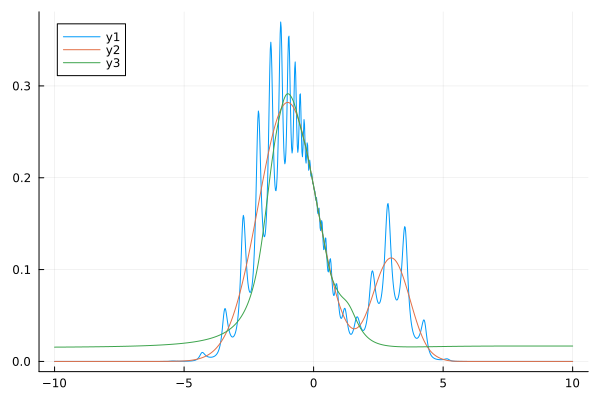

In [20]:
plot()
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val)/pi)
#plot!(real.(f64_wo_sol.reals.freq), imag.(f64_wo_sol.reals.val)/pi)
plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val))/pi)
plot!(Float64.(real.((f64_sol.reals.freq))), Float64.(imag.(f64_sol.reals.val))/pi)
#plot!(omegas, rho.(omegas))
#savefig("picture.png")

In [12]:
plot(xlim = [-6,6],
    legend = :topright,
    ymirror = true, 
    xticks = [5,0,-5],
    yticks = [0.3,0,-0.3],
    xtickfont=font(15), 
    ytickfont=font(15), 
    guidefont=font(25), 
    legendfont=font(20))
plot!(xlabel=latexstring("\\omega"))
#plot!(ylabel=latexstring("\\rho"))
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val/pi),label="non-opt",lw=3)
plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val)/pi),label="opt",lw=3)
plot!(omegas, rho.(omegas), label="exact",lw=1.5,ls=:dash,lc=:black)
#savefig("two_peak.svg")

LoadError: UndefVarError: wo_sol not defined